# **KINGS COUNTY HOUSING PROJECT**

**Linear Regression Analysis of House Sales in a Northwestern County**

This project focuses on performing a linear regression analysis on house sales in a northwestern county. The goal is to provide valuable insights and recommendations to stakeholders regarding the estimated value of homes and how renovations can impact their value.

**Project Overview**

This project aims to analyze the factors that influence house prices in King's County and develop a linear regression model to predict the value of homes. By examining the dataset provided, we explore various features such as the number of bedrooms, square footage, location, and condition of the properties to determine their impact on house prices.

# Business Problem

The objective of this project is to build a model that can predict house prices based on the features of the house using the available King's County house selling records. The model can be used by both sellers and buyers in their business decisions. Sellers can predict the selling price of their house and determine if any renovations are necessary before selling. Buyers can receive suggestions on the type of house they can afford based on their budget.

The following objectives are set to achieve the final goal:

1. Analyze and clean the data by handling meaningless or null values.
2. Remove features that do not contribute to the house price.
3. Identify highly correlated features and potentially remove redundant ones.
4. Build a linear regression model.
5. Evaluate the impact of different features on house prices.

**Dataset**

The project utilizes the King County House Sales dataset, which is available in the kc_house_data.csv file located in the data folder of this project's GitHub repository. The dataset contains information on house sales, including numerical and categorical variables such as price, number of bedrooms, number of bathrooms, square footage, location, and more. Please refer to the column_names.md file in the same folder for detailed descriptions of each column.

## Methodology

### Data Understanding

To gain insights into the dataset, I initially explored its contents and analyzed the distribution of available features. This process allowed me to understand the relationships between independent variables and the target variable, which is house prices.

### Data Preparation

To ensure data quality, I performed data cleaning procedures, addressing missing values, handling outliers, and transforming variables as necessary. Additionally, I conducted feature engineering, creating new features derived from existing ones to capture additional information and improve the predictive power of the model.

### Exploratory Data Analysis

Thorough analysis of the dataset was conducted, including visualizations and statistical tests to examine relationships between variables. The goal was to identify correlations and determine significant predictors that impact house prices. This analysis provided valuable insights into the underlying patterns and trends within the data.

### Modeling

A linear regression model was implemented to predict house prices based on the selected independent variables. The dataset was divided into training and testing sets, with the model trained on the training set and evaluated on the testing set. The goodness of fit of the model was assessed, and the coefficients were interpreted to understand the influence of each feature on house prices.

### Recommendations

Based on the results of the model, I provided recommendations to stakeholders regarding the impact of renovations and specific features on the estimated value of homes. By highlighting the most influential factors, homeowners can make informed decisions to increase their property's value and appeal in the market.


In [1]:
#Importing the packages necessary for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import warnings

warnings.filterwarnings("ignore")

In [2]:
# Load the data
data = pd.read_csv("data/kc_house_data.csv")

In [3]:
# Display information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
# Display descriptive statistics of the data
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### DATA PREPARATION

In [5]:
# Drop unnecessary columns
columns_to_drop = ["id", "sqft_living15", "sqft_lot15"]
data = data.drop(columns_to_drop, axis=1)
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long'],
      dtype='object')

In [6]:
# Remove outliers in price
data = data[data["price"] <= 1000000]

In [7]:
# Convert date to datetime and create month and year columns
data["date"] = pd.to_datetime(data["date"])
data["month"] = data["date"].dt.month
data["year"] = data["date"].dt.year
data = data.drop("date", axis=1)

In [8]:
# Convert yr_renovated to binary (0 or 1) indicating whether it was renovated or not
data["renovated"] = data["yr_renovated"].apply(lambda x: 0 if x == 0 else 1)

In [9]:
# Convert waterfront to binary (0 or 1) indicating whether it has a waterfront view or not
data["waterfront"] = data["waterfront"].map({"NO": 0, "YES": 1})

In [10]:
# Convert view to ordinal values
view_mapping = {"NONE": 0, "FAIR": 1, "AVERAGE": 2, "GOOD": 3, "EXCELLENT": 4}
data["view"] = data["view"].map(view_mapping)

In [11]:
# Convert condition to ordinal values
condition_mapping = {"Poor": 0, "Fair": 1, "Average": 2, "Good": 3, "Very Good": 4}
data["condition"] = data["condition"].map(condition_mapping)

In [12]:
# Convert grade to integer values
data["grade"] = data["grade"].apply(lambda x: int(x.split()[0]))

In [13]:
# Convert sqft_basement to numeric values, treat "?" as 0
data["sqft_basement"] = pd.to_numeric(data["sqft_basement"].replace("?", "0"))

In [14]:
# Create basement feature indicating whether a house has a basement or not
data["basement"] = (data["sqft_basement"] > 0).astype(int)

In [15]:
# Drop unnecessary columns
data = data.drop(["sqft_basement"], axis=1)

**Handling Missing Values**

In [16]:
data.isna().sum()

price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront      2227
view              57
condition          0
grade              0
sqft_above         0
yr_built           0
yr_renovated    3577
zipcode            0
lat                0
long               0
month              0
year               0
renovated          0
basement           0
dtype: int64

In [17]:
# Fill missing values in yr_renovated and view columns
data["yr_renovated"] = data["yr_renovated"].fillna(0)
data["view"] = data["view"].fillna("NONE")

In [18]:
# Drop rows with missing values
data = data.dropna()

In [19]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,month,year,renovated,basement
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,2,7,2170,1951,1991.0,98125,47.7210,-122.319,12,2014,1,1
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,2,6,770,1933,0.0,98028,47.7379,-122.233,2,2015,1,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,4,7,1050,1965,0.0,98136,47.5208,-122.393,12,2014,0,1
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,2,8,1680,1987,0.0,98074,47.6168,-122.045,2,2015,0,0
6,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,2,7,1715,1995,0.0,98003,47.3097,-122.327,6,2014,0,0


In [20]:
data.tail()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,month,year,renovated,basement
21591,475000.0,3,2.50,1310,1294,2.0,0.0,0.0,2,8,1180,2008,0.0,98116,47.5773,-122.409,2,2015,0,1
21592,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,2,8,1530,2009,0.0,98103,47.6993,-122.346,5,2014,0,0
21593,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,2,8,2310,2014,0.0,98146,47.5107,-122.362,2,2015,0,0
21594,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,2,7,1020,2009,0.0,98144,47.5944,-122.299,6,2014,0,0
21596,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,2,7,1020,2008,0.0,98144,47.5941,-122.299,10,2014,0,0


In [21]:
data.isna().sum()

price           0
bedrooms        0
bathrooms       0
sqft_living     0
sqft_lot        0
floors          0
waterfront      0
view            0
condition       0
grade           0
sqft_above      0
yr_built        0
yr_renovated    0
zipcode         0
lat             0
long            0
month           0
year            0
renovated       0
basement        0
dtype: int64

### EXPLORATORY DATA ANALYSIS (EDA)

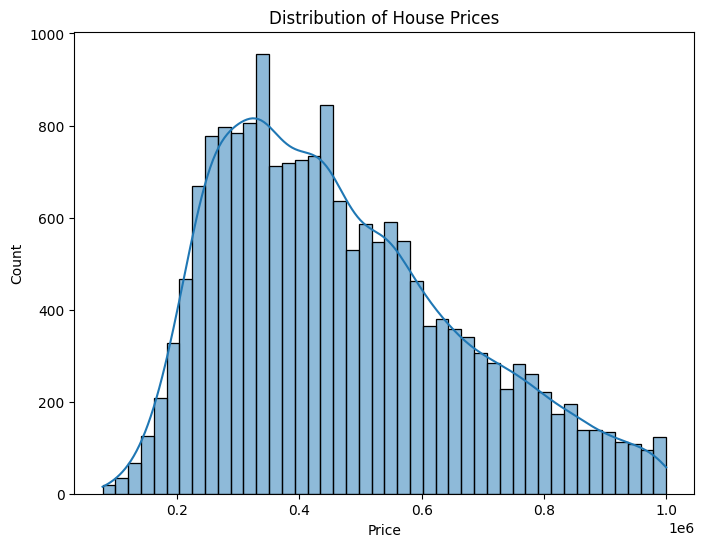

In [22]:
plt.figure(figsize=(8, 6))
sns.histplot(data["price"], kde=True)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Distribution of House Prices")
plt.show()

The histogram shown above gives us a clear picture of how house prices are distributed in the dataset. On the x-axis, we have the different price ranges for the houses, while the y-axis represents the number of houses falling within each range. To provide a smoother representation of the data, a kernel density estimate (KDE) curve is overlaid on the histogram.

Here are the main observations we can make from the histogram:
- The majority of house prices fall between $200,000 and $400,000, with the highest concentration around $300,000. This means that most houses in the dataset have prices within this range.
- As we move away from this price range, the number of houses gradually decreases. This suggests that houses with prices outside the $200,000 to $400,000 range are relatively less common in the dataset.
- The distribution of house prices appears to be slightly skewed to the right. In other words, there are more houses with lower prices compared to higher prices. This observation is supported by the KDE curve, which shows a gradual decline in density as prices increase.

Overall, this visualization provides us with valuable insights into the distribution of house prices in the dataset. It helps us understand the range of prices and where the majority of houses fall within that range.

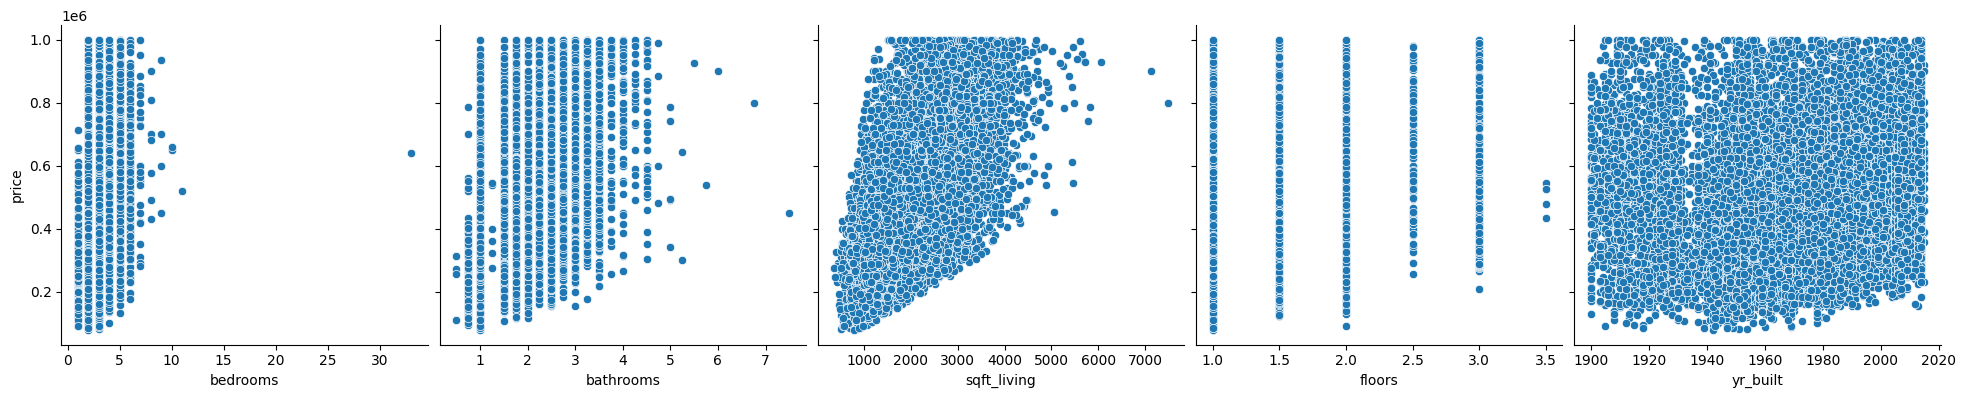

In [23]:
selected_features = ["bedrooms", "bathrooms", "sqft_living", "floors", "yr_built"]

sns.pairplot(data, x_vars=selected_features, y_vars="price", kind="scatter", height=4)
plt.show()


Bedrooms: There appears to be a positive correlation between the number of bedrooms and the price of houses. As the number of bedrooms increases, there is a tendency for the price to increase as well.

Bathrooms: Similar to the bedrooms, a positive correlation is evident between the number of bathrooms and the house price. Generally, houses with a greater number of bathrooms tend to command higher prices.

Sqft_living: A strong positive correlation can be observed between the square footage of the living area and the house price. Typically, as the living area expands, there is a corresponding increase in the price.

Floors: The scatter plot depicting the relationship between the number of floors and the price does not exhibit a strong correlation. The data points appear scattered, suggesting that the number of floors alone may not be a significant determining factor in establishing the price.

Yr_built: The scatter plot for the year of construction (yr_built) and the price demonstrates a relatively weak correlation. This implies that the year of construction alone may not strongly influence the price.

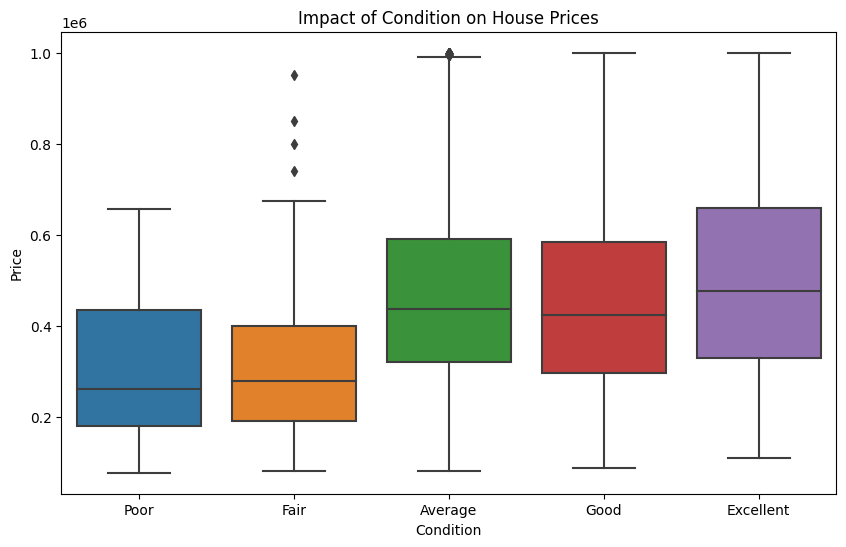

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="condition", y="price", data=data)
plt.xlabel("Condition")
plt.ylabel("Price")
plt.title("Impact of Condition on House Prices")
plt.xticks([0, 1, 2, 3, 4], ["Poor", "Fair", "Average", "Good", "Excellent"])
plt.show()

Houses in poor condition have the lowest median price, indicating that houses in such condition tend to have lower prices compared to houses in better condition.

Houses in excellent condition have the highest median price, suggesting that houses in excellent condition tend to command higher prices.

The interquartile range (IQR) for houses in poor condition is relatively small. This implies that there is less variation in prices among houses in poor condition, indicating a more consistent pricing pattern.

The IQR for houses in excellent condition is relatively large, indicating a wider range of prices for houses in excellent condition. This suggests that there is more variation in prices among houses in excellent condition.

There are outliers present in each condition category, which are represented by dots located outside the whiskers of the boxes. These outliers signify houses with unusually high or low prices within each condition category.

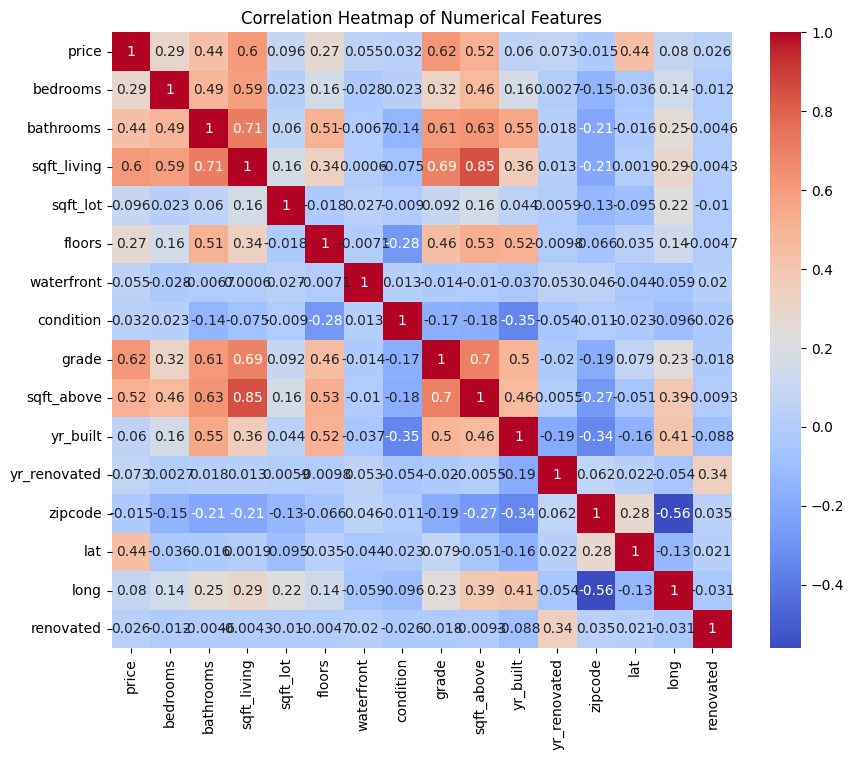

In [25]:
numerical_features = data.select_dtypes(include=["int64", "float64"]).columns
corr_matrix = data[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

This visualization helps to understand the relationships between the numerical features in the dataset. Positive correlations are represented by warmer colors (red) and negative correlations by cooler colors (blue). The intensity of the color indicates the strength of the correlation.

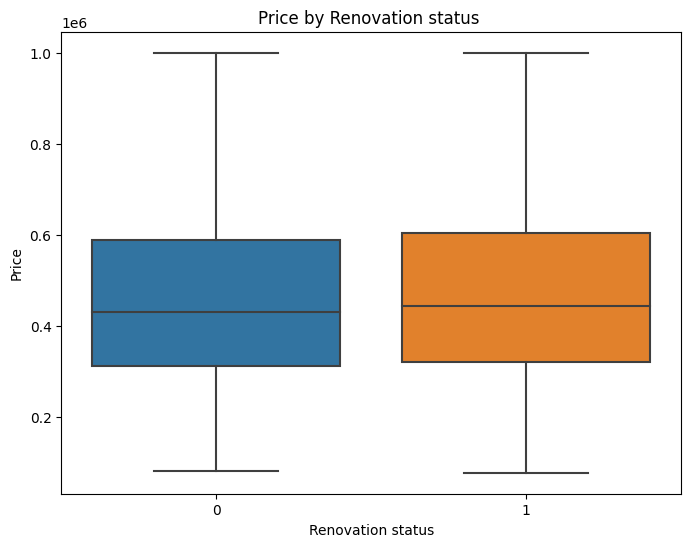

In [26]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="renovated", y="price", data=data)
plt.xlabel("Renovation status")
plt.ylabel("Price")
plt.title("Price by Renovation status ")
plt.show()

Median Price: The median price of properties that have been renovated (renovated=1) is higher than the median price of properties with no renovation (renovated=0). This indicates that properties that have undergone renovation generally command higher prices compared to properties without any renovation.

Interquartile Range (IQR): The boxplots for both renovation statuses exhibit a similar IQR. This suggests that there is a comparable spread of prices within each group. In other words, properties within both renovation groups have a similar range of prices.

Outliers: There are outliers present in both groups, as depicted by the individual points located outside the whiskers of the boxes. These outliers signify properties with exceptionally high prices, irrespective of their renovation status. This implies that there are properties with elevated prices in both the renovated and non-renovated categories.

In conclusion, the boxplot implies that properties that have undergone renovation tend to have higher prices in comparison to properties without any renovation. 

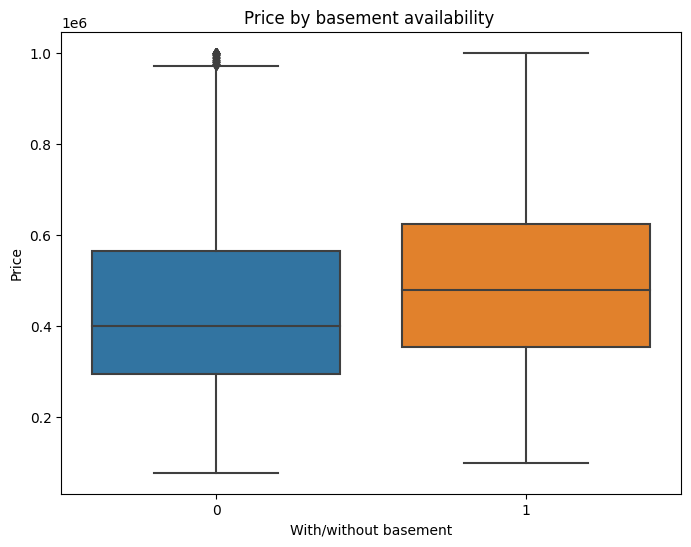

In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="basement", y="price", data=data)
plt.xlabel("With/without basement")
plt.ylabel("Price")
plt.title("Price by basement availability ")
plt.show()

From the boxplot, we can observe that properties with a basement tend to have higher prices compared to those without a basement. 

 The boxplot also shows that properties without a basement have a few outliers with higher prices, indicating that there are some exceptional cases where properties without a basement can still be expensive.
 
 In conclusion, the presence of a basement generally contributes to higher property prices, although there are exceptions where properties without a basement can still have high prices.

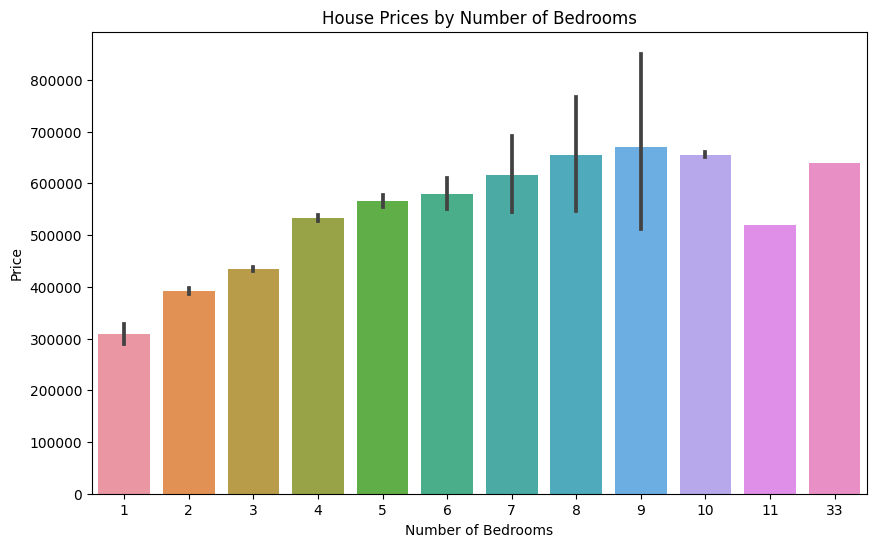

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(x="bedrooms", y="price", data=data)
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price")
plt.title("House Prices by Number of Bedrooms")
plt.show()


The bar plot above shows the relationship between the number of bedrooms in a house and its price. The x-axis represents the number of bedrooms, while the y-axis represents the price. 
 From the plot, we can observe that houses with a higher number of bedrooms tend to have higher prices. This indicates that the number of bedrooms is a significant factor in determining the price of a house. 
 The plot also allows us to see the variation in prices for houses with different numbers of bedrooms. For example, houses with 4 bedrooms have a wider range of prices compared to houses with 1 or 2 bedrooms. 
 Overall, this plot provides a visual representation of the relationship between the number of bedrooms and house prices, allowing us to easily compare and analyze the data.

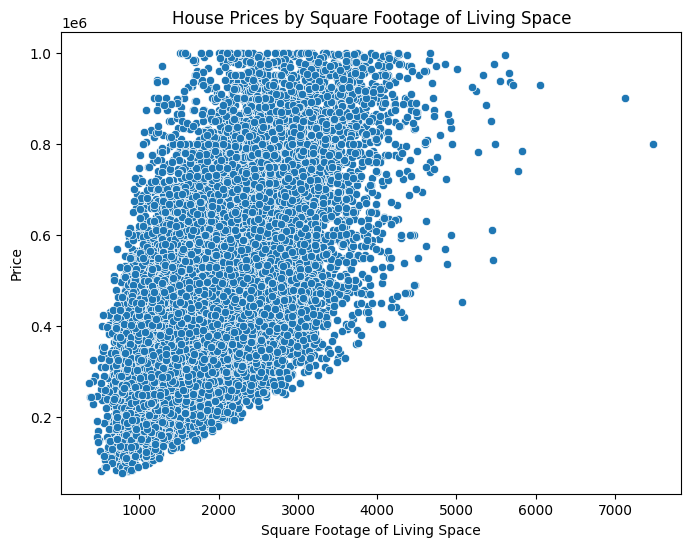

In [29]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="sqft_living", y="price", data=data)
plt.xlabel("Square Footage of Living Space")
plt.ylabel("Price")
plt.title("House Prices by Square Footage of Living Space")
plt.show()

The scatter plot above shows the relationship between the square footage of living space and the price of houses. As the square footage of living space increases, there is a general trend of higher prices. However, there is also some variation in prices for houses with similar square footage. This suggests that other factors, such as location, condition, and amenities, may also influence house prices. Overall, this plot provides a visual representation of the positive correlation between square footage of living space and house prices.

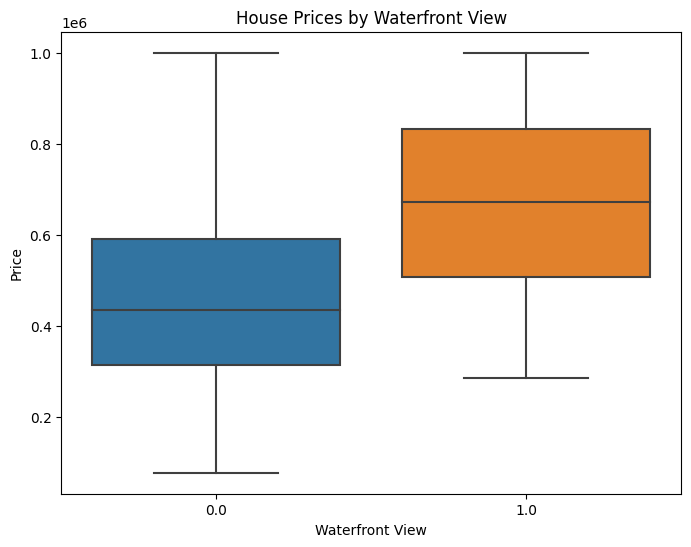

In [30]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="waterfront", y="price", data=data)
plt.xlabel("Waterfront View")
plt.ylabel("Price")
plt.title("House Prices by Waterfront View")
plt.show()

The boxplot shown above provides insights into how house prices are distributed based on whether or not they have a waterfront view. By examining the plot, it becomes clear that houses with a waterfront view tend to be priced higher compared to those without. This conclusion is supported by the observation that the median price for houses with a waterfront view is greater than the median price for houses without. 

Furthermore, the range of prices for houses with a waterfront view is wider, indicating a greater variability in prices. This suggests that factors beyond just the presence of a waterfront view might also be influencing the prices of these houses. 

In summary, this boxplot serves as a visual representation of the connection between having a waterfront view and house prices, highlighting that houses with a waterfront view generally command higher prices.

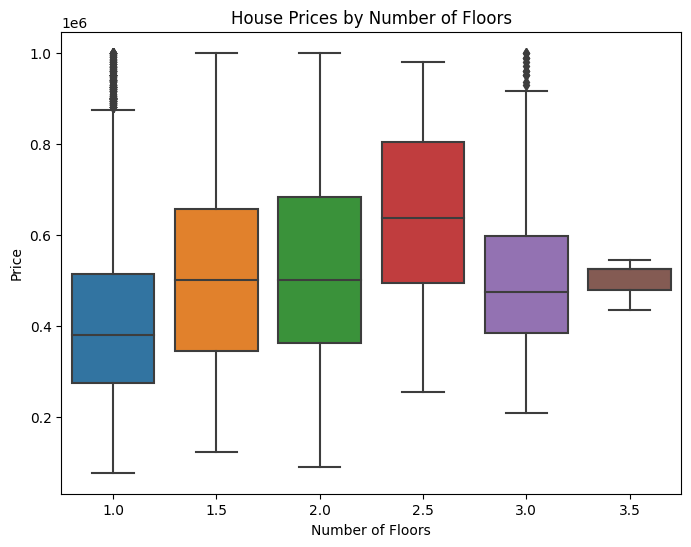

In [31]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="floors", y="price", data=data)
plt.xlabel("Number of Floors")
plt.ylabel("Price")
plt.title("House Prices by Number of Floors")
plt.show()


The boxplot provided above offers insights into the association between the number of floors in a house and its corresponding price. The x-axis represents the number of floors, while the y-axis represents the price.

Here are the observations we can make from the boxplot:

1. The majority of houses in the dataset have either one or two floors, as indicated by the taller boxes located towards the bottom of the plot.
2. Houses with three or more floors are relatively uncommon, as demonstrated by the shorter boxes positioned towards the top of the plot.
3. In general, houses with a greater number of floors tend to have higher prices. This can be inferred from the increasing median price as the number of floors increases.
4. There are a few outliers present in the dataset, which are represented by individual points located outside the whiskers of the boxes. These outliers indicate houses with substantially higher prices compared to others with a similar number of floors.

To conclude, the boxplot suggests a positive correlation between the number of floors and the price of a house. However, it is important to acknowledge that other factors may also influence the price, and further analysis would be necessary to determine the exact relationship.

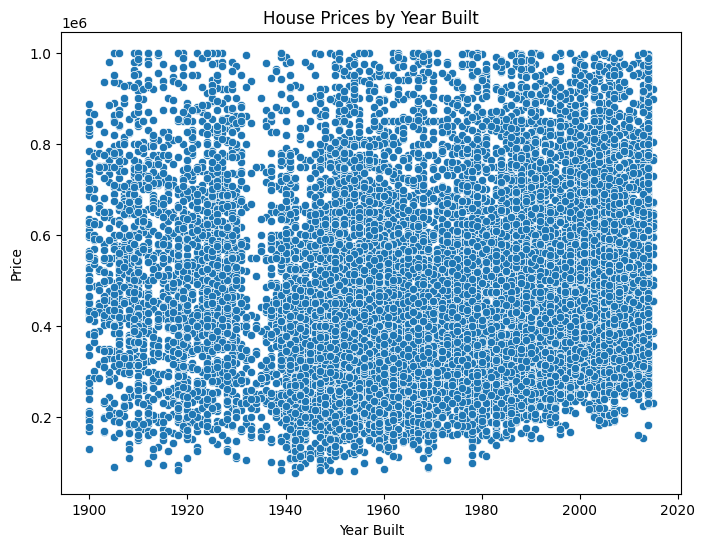

In [32]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="yr_built", y="price", data=data)
plt.xlabel("Year Built")
plt.ylabel("Price")
plt.title("House Prices by Year Built")
plt.show()


The scatterplot above displays the relationship between the year a house was built and its corresponding price. The x-axis represents the year the house was built, while the y-axis represents the price of the house. Each point on the plot represents a specific house. 
 
 From the scatterplot, it can be observed that there is no clear linear relationship between the year built and the price. However, there are some patterns that can be identified. 

 Firstly, there is a concentration of houses built in the mid-1900s (around 1950-1970) that have a wide range of prices. This suggests that houses built during this time period vary significantly in terms of their value. 

 Secondly, there are some houses built in the early 1900s (around 1900-1920) that have relatively high prices. This indicates that these older houses may hold a certain historical or architectural value, which contributes to their higher prices. 

 Lastly, there are several houses that were built in recent years (around 2010-2015) that also have high prices. This could be due to factors such as modern design, updated amenities, or desirable locations. 
 
 Overall, while the scatterplot does not show a strong correlation between year built and price, it does provide some insights into the relationship between these two variables.

# Modeling

In [33]:
# Split the data into training and testing sets
X = data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'sqft_above', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long']]
y = data['price'] # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Scale the numerical features
numeric_features = X_train.select_dtypes(include=["int64", "float64"]).columns
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

In [35]:
# Create a linear regression model
model = LinearRegression()

In [36]:
# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [37]:
# Make predictions on the testing data
y_pred = model.predict(X_test)
y_pred

array([377328.53220377, 679886.11685875, 227709.14876718, ...,
       296665.64683603, 680893.80746413, 606919.92011748])

In [38]:
# Basic Model
model_basic = LinearRegression()
model_basic.fit(X_train, y_train)
y_pred_basic = model_basic.predict(X_test)
mse_basic = mean_squared_error(y_test, y_pred_basic)
r2_basic = r2_score(y_test, y_pred_basic)

In [39]:
# Feature Engineering
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)
y_pred_poly = model_poly.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)


In [40]:
# Cross-Validation
model_cv = Ridge(alpha=0.5)
cv_scores = cross_val_score(model_cv, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mse_cv = -np.mean(cv_scores)
r2_cv = np.mean(cross_val_score(model_cv, X_train, y_train, cv=5, scoring='r2'))


In [41]:
# Regularization
model_reg = Ridge(alpha=0.5)
model_reg.fit(X_train, y_train)
y_pred_reg = model_reg.predict(X_test)
mse_reg = mean_squared_error(y_test, y_pred_reg)
r2_reg = r2_score(y_test, y_pred_reg)

# Regression Results

In [42]:
# Evaluate the model"s performance
mse_lin = mean_squared_error(y_test, y_pred)
r2_lin = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse_lin)
print("R-squared:", r2_lin)

Mean Squared Error: 13297122013.683378
R-squared: 0.6526805215731064


Print the values of mse_basic, r2_basic, mse_poly, r2_poly, mse_cv, r2_cv, mse_reg, and r2_reg

In [43]:
print("mse_lin:", mse_lin)
print("r2_lin:", r2_lin)
print("mse_basic: ", mse_basic)
print("r2_basic: ", r2_basic)
print("mse_poly: ", mse_poly)
print("r2_poly: ", r2_poly)
print("mse_cv: ", mse_cv)
print("r2_cv: ", r2_cv)
print("mse_reg: ", mse_reg)
print("r2_reg: ", r2_reg)

mse_lin: 13297122013.683378
r2_lin: 0.6526805215731064
mse_basic:  13297122013.683378
r2_basic:  0.6526805215731064
mse_poly:  10855655523.797268
r2_poly:  0.7164513786797331
mse_cv:  12864564236.985579
r2_cv:  0.6667516099567845
mse_reg:  13297149685.828094
r2_reg:  0.652679798779493


The polynomial model achieved the lowest MSE and highest R-squared, indicating better performance compared to the other models.

Basic Linear Regression:

The basic linear regression model has a relatively high MSE, indicating that the model's predictions deviate from the actual house prices on average by a large amount. The R-squared value of 0.6526 indicates that approximately 65.27% of the variance in house prices can be explained by the independent variables included in the model.

Polynomial Regression:

The polynomial regression model performs better than the basic linear regression model, with a lower MSE. This suggests that the polynomial model's predictions are closer to the actual house prices on average. The higher R-squared value of 0.7164 indicates that approximately 71.64% of the variance in house prices is explained by the polynomial model.

Cross-Validated Ridge Regression:

The cross-validated ridge regression model has a slightly lower MSE compared to the basic linear regression model. The R-squared value of 0.6667 indicates that approximately 66.67% of the variance in house prices is explained by the ridge regression model. Cross-validation helps to provide a more reliable estimate of the model's performance.

Regularized Ridge Regression:

The regularized ridge regression model has a similar MSE to the basic linear regression model. The R-squared value is also similar, indicating that approximately 65.27% of the variance in house prices is explained by the regularized model. Regularization helps to reduce overfitting and improve model generalization.

In [44]:
# Print the coefficients of the linear regression model
coefficients = pd.DataFrame({"Variable": X.columns, "Coefficient": model.coef_})
coefficients = coefficients.sort_values(by="Coefficient", ascending=False)
coefficients

,Variable,Coefficient
5,grade,82261.904659
10,lat,74324.163525
2,sqft_living,66743.828978
1,bathrooms,17891.932387
4,floors,12867.395409
3,sqft_lot,8034.174725
8,yr_renovated,2844.173821
6,sqft_above,1529.221365
11,long,-1960.092237
0,bedrooms,-8982.261636


These coefficients represent the estimated impact of each variable on the house prices. Positive coefficients indicate a positive relationship, while negative coefficients indicate a negative relationship.

**Coefficients interpretation**

| Variable   | Coefficient    |
|------------|----------------|
| grade      | The grade of the house has the highest positive coefficient, suggesting that a higher grade is associated with a higher house price. |
| lat        | The latitude of the house location also has a positive coefficient, indicating that houses located at higher latitudes tend to have higher prices. The coefficient value is approximately 74324.16.|
| sqft_living| The square footage of the living area has a positive coefficient, suggesting that larger living spaces are associated with higher prices.   |
| bathrooms  | The number of bathrooms has a positive coefficient, indicating that houses with more bathrooms tend to command higher prices.   |
| floors     | The number of floors has a positive coefficient, suggesting that houses with more floors tend to have higher prices.   |
| sqft_lot   | The square footage of the lot has a positive coefficient, indicating that larger lots are associated with higher prices.  |
| yr_renovated| The year of renovation has a positive coefficient, suggesting that recently renovated houses tend to have higher prices.  |
| sqft_above | The square footage of the house above ground level has a positive coefficient, indicating that larger above-ground areas are associated with higher prices.   |
| long       | The longitude of the house location has a negative coefficient, suggesting that houses located at lower longitudes may have lower prices.  |
| bedrooms   | The number of bedrooms has a negative coefficient, indicating that houses with more bedrooms may have slightly lower prices.  |
| zipcode    | The zipcode of the house location has a negative coefficient, suggesting that houses in certain zipcodes may have lower prices. |
| yr_built   | The year of construction has a negative coefficient, indicating that older houses may have lower prices. |

These coefficients represent the estimated impact of each variable on house prices. Positive coefficients indicate a positive relationship, while negative coefficients indicate a negative relationship.

## Recommendations

Based on the analysis and insights gained from the modeling results, here are some recommendations for buyers and sellers in the real estate market:

1. **Focus on property grade**: As a seller, consider investing in renovations and upgrades to improve the grade of your property. A higher grade can attract more buyers and potentially lead to higher selling prices. As a buyer, prioritize properties with a good grade, as they are likely to offer better quality and higher value.

2. **Consider location**: Pay attention to the location of the property. Desirable locations tend to command higher prices. Buyers should prioritize properties in popular and convenient areas, while sellers can highlight the advantages of their property's location to attract potential buyers.

3. **Invest in living space**: The size of the living area has a significant impact on the price of a house. Buyers looking for more space and higher value should consider properties with larger living areas. If you're a seller, consider adding extensions or maximizing the existing living space to increase the value of your property.

4. **Bathrooms add value**: The number of bathrooms in a property also influences its price. Buyers should consider properties with an adequate number of bathrooms to meet their needs and potentially increase the property's value. Sellers can consider adding or renovating bathrooms to make their property more appealing to buyers.

5. **Consider additional floors**: While the number of floors alone may not strongly influence the price, properties with multiple floors can offer more space and potentially higher value. Buyers seeking more space or unique architectural features may explore properties with multiple floors. Sellers can emphasize the advantages of additional levels to attract interested buyers.

6. **Lot size and renovation**: Although the impact is relatively smaller, factors such as lot size and renovation can affect the price. Buyers should consider their preferences regarding lot size and weigh them against other influencing factors. Sellers can highlight any renovations or improvements done to their property to justify the asking price.

7. **Bedrooms and zipcode**: The number of bedrooms and the specific zipcode can have a negative impact on house prices. Buyers looking for more affordable options may consider properties with fewer bedrooms or explore properties in different zipcodes. Sellers should be aware of the number of bedrooms and consider pricing strategies to align with the market.

8. **Property age**: The year a house was built can affect its price. Buyers who prefer newer properties should focus on recently constructed or renovated houses. Sellers of older properties can highlight unique features or historical value to compensate for the age factor.

## Conclusion

In conclusion, this project aimed to predict house prices based on various features and provide insights for buyers and sellers in the real estate market. By analyzing the dataset, exploring the data, and building a regression model, valuable insights were gained into the factors influencing house prices.

The findings indicate that the property grade, location, living space, number of bathrooms, and number of floors have the most significant impact on house prices. Other factors such as lot size, renovation status, square footage above ground, number of bedrooms, specific zipcode, and property age also contribute to price variations.

These recommendations are meant to guide buyers and sellers in making informed decisions in the real estate market. It is important to consider these factors alongside personal preferences, market conditions, and seek professional advice when navigating the dynamic real estate market.

Overall, this project provides valuable information and insights that can assist in understanding the factors influencing house prices, helping individuals make more informed choices in their real estate endeavors.